In [12]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
sns.set_palette('hls', 8)
drive.mount('/content/drive')
warnings.simplefilter('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Classification (Random Forest, Decision Tree, and SVM)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Wine Data/wine_data/WineQT.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


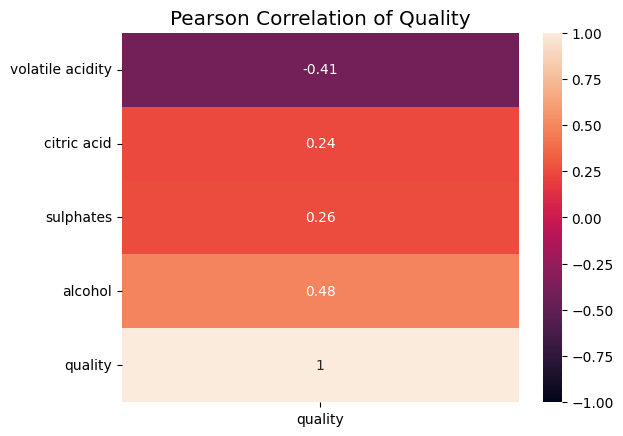

In [15]:
inf_cols = df[['quality', 'alcohol', 'citric acid', 'volatile acidity', 'sulphates']]
quality_corr = inf_cols.corr()
sns.heatmap(quality_corr[['quality']].sort_values(by = ['quality']), annot = True, vmin = -1)
sns.set(font_scale = 1.2)
plt.title('Pearson Correlation of Quality')
# plt.savefig('figs/single_column_corr.svg', bbox_inches = 'tight', format = 'svg')
plt.show()

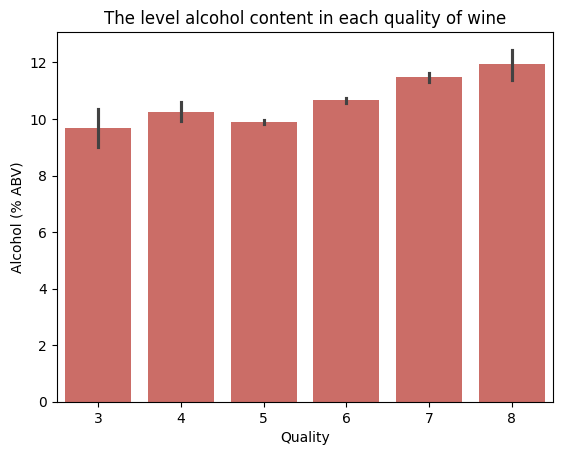

In [13]:
sns.barplot(data = df, x = 'quality', y = 'alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol (% ABV)')
plt.title('The level alcohol content in each quality of wine')
plt.show()

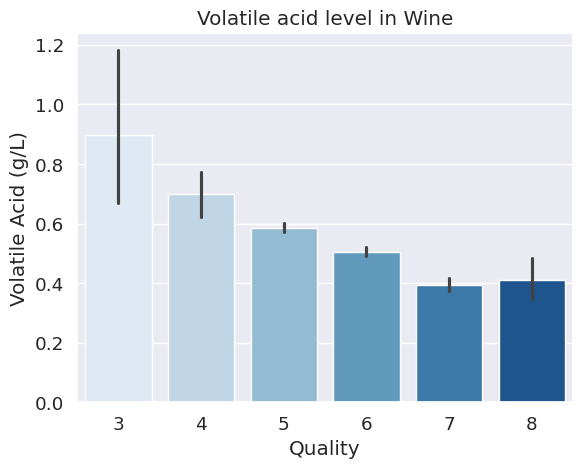

In [16]:
# Volatile Acid in Wine
sns.barplot(df, x = 'quality', y = 'volatile acidity', estimator = 'mean', palette = sns.color_palette('Blues'))
plt.title('Volatile acid level in Wine')
plt.ylabel('Volatile Acid (g/L)')
plt.xlabel('Quality')
# plt.savefig('figs/volatile_acid', dpi = 200, bbox_inches = 'tight')
plt.show()

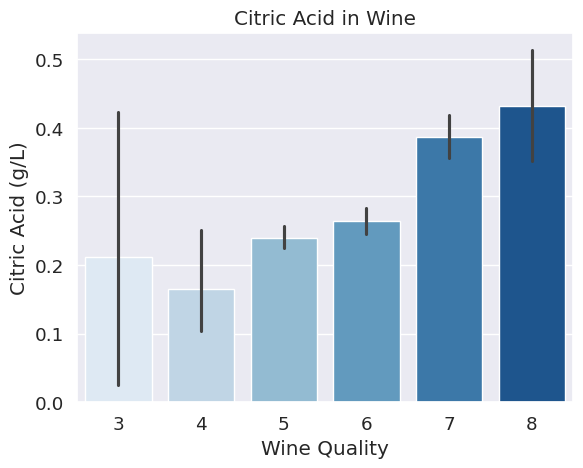

In [17]:
# Citric Acid in Wine

sns.barplot(df, x = 'quality', y = 'citric acid', palette = sns.color_palette('Blues'))
plt.title('Citric Acid in Wine')
plt.ylabel('Citric Acid (g/L)')
plt.xlabel('Wine Quality')
# plt.savefig('figs/citric_acid', dpi = 200, bbox_inches = 'tight')
plt.show()

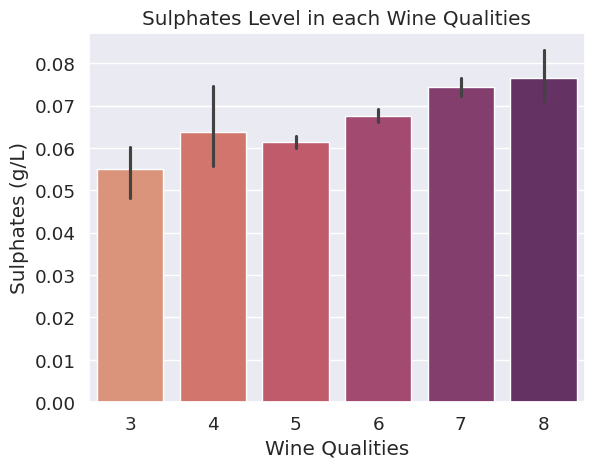

In [18]:
# Sulphates in Wine

sns.barplot(df, x = 'quality', y = df['sulphates']/10, palette = sns.color_palette('flare'))
plt.title("Sulphates Level in each Wine Qualities")
plt.xlabel('Wine Qualities')
plt.ylabel('Sulphates (g/L)')
# plt.savefig('figs/sulphates', dpi = 200, bbox_inches = 'tight')
plt.show()

In [ ]:
# Encode label
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
new_labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = new_labels)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bad,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad,1595


In [ ]:
df.drop('Id', axis =1, inplace = True)

In [ ]:
le = LabelEncoder()
df['quality_code'] = le.fit_transform(df['quality'])
df[['quality', 'quality_code']].value_counts()

,,count
quality,quality_code,
bad,0,984
good,1,159


In [ ]:
# Train test Split
X = df.drop(['quality', 'quality_code'], axis = 1)
y = df['quality_code']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
sc = StandardScaler()
X_trn_sc = sc.fit_transform(X_train)
X_tst_sc = sc.fit_transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC(probability = True)
dtc.fit(X_trn_sc, y_train)
rfc.fit(X_trn_sc, y_train)
svc.fit(X_trn_sc, y_train)
dtc_result = pd.DataFrame(dtc.predict(X_test), columns = ['DTC result'])
dtc_result

,DTC result
0,0
1,0
2,0
3,0
4,0
...,...
281,0
282,0
283,0
284,0


In [ ]:
rfc_result = pd.DataFrame(rfc.predict(X_test), columns = ['RFC result'])
rfc_result

,RFC result
0,0
1,0
2,0
3,0
4,0
...,...
281,0
282,0
283,0
284,0


Low Wine: ROC AUC = 0.500
dict_keys(['Random Forest', 'Decision Tree', 'Support Vector Classifier', 'No Model']) dict_values([0.9354173450558992, 0.701074568544448, 0.8909150113969392, 0.5])


Text(0, 0.5, 'True Positive Rate')

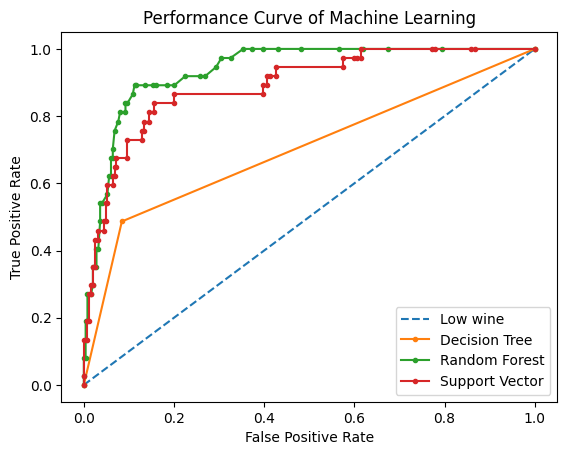

In [ ]:
# Calculate ROC and AUC

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pylab as plt

rfc_prob = rfc.predict_proba(X_tst_sc)
dtc_prob = dtc.predict_proba(X_tst_sc)
svc_prob = svc.predict_proba(X_tst_sc)

# high wine
rfc_high_wine = rfc_prob[:, 1]
dtc_high_wine = dtc_prob[:, 1]
svc_high_wine = svc_prob[:, 1]

# low wine
low_wine_prob = [0 for _ in range (len(y_test))]


# calculate score
low_wine_auc = roc_auc_score(y_test,low_wine_prob)
rfc_auc = roc_auc_score(y_test, rfc_high_wine)
dtc_auc = roc_auc_score(y_test,dtc_high_wine)
svc_auc = roc_auc_score(y_test, svc_high_wine)

# summarize score
print('Low Wine: ROC AUC = %.3f' %(low_wine_auc))
auc_scores = {'Random Forest': rfc_auc,
              'Decision Tree': dtc_auc,
              'Support Vector Classifier': svc_auc,
             'No Model': low_wine_auc}
print(auc_scores.keys(), auc_scores.values())

# Calculate ROC curve
low_wine_fpr, low_wine_tpr, _ = roc_curve(y_test, low_wine_prob)
high_wine_fpr_rfc, high_wine_tpr_rfc, _ = roc_curve(y_test, rfc_high_wine)
high_wine_fpr_dtc, high_wine_tpr_dtc, _ = roc_curve(y_test, dtc_high_wine)
high_wine_fpr_svc, high_wine_tpr_svc, _ = roc_curve(y_test, svc_high_wine)

# Roc curve plot
plt.plot(low_wine_fpr, low_wine_tpr, linestyle = '--', label = 'Low wine')
plt.plot(high_wine_fpr_dtc, high_wine_tpr_dtc, marker = '.', label = 'Decision Tree')
plt.plot(high_wine_fpr_rfc, high_wine_tpr_rfc, marker = '.', label = 'Random Forest')
plt.plot(high_wine_fpr_svc, high_wine_tpr_svc, marker = '.', label = 'Support Vector')

plt.title('Performance Curve of Machine Learning')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

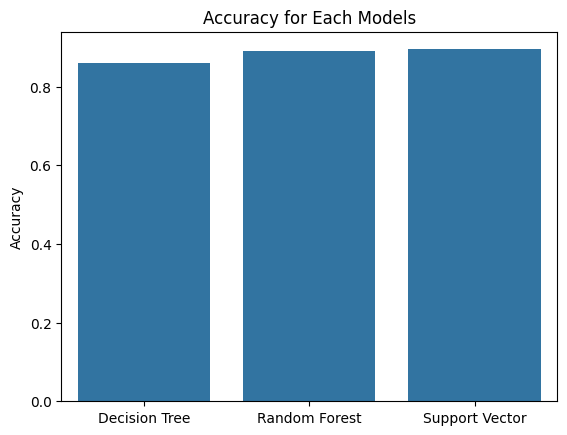

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns
y_pred_dtc = dtc.predict(X_tst_sc)
y_pred_rfc = rfc.predict(X_tst_sc)
y_pred_svc = svc.predict(X_tst_sc)

acc_scores = {'Decision Tree': accuracy_score(y_test, y_pred_dtc),
             'Random Forest': accuracy_score(y_test, y_pred_rfc),
             'Support Vector': accuracy_score(y_test, y_pred_svc)}
scores = list(acc_scores.values())
labels = list(acc_scores.keys())

sns.barplot(x = labels, y = scores)
plt.title('Accuracy for Each Models')
plt.ylabel('Accuracy')
plt.show()

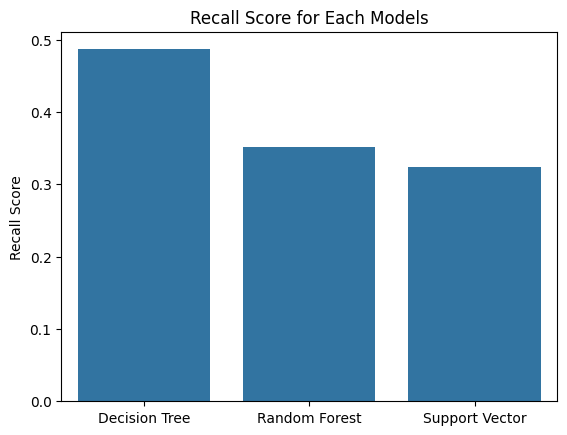

In [ ]:
recall_scores = {'Decision Tree': recall_score(y_test, y_pred_dtc),
             'Random Forest': recall_score(y_test, y_pred_rfc),
             'Support Vector': recall_score(y_test, y_pred_svc)}
scores = list(recall_scores.values())
labels = list(recall_scores.keys())

sns.barplot(x = labels, y = scores)
plt.title('Recall Score for Each Models')
plt.ylabel('Recall Score')
plt.show()

In [ ]:
importances_dtc = dtc.feature_importances_
importances_dtc

array([0.09681895, 0.10899802, 0.07034432, 0.05642546, 0.03880475,
       0.06947829, 0.05165432, 0.0194388 , 0.08985061, 0.1566404 ,
       0.24154608])

In [ ]:
coef_res_dtc = pd.DataFrame({'Col_name': list(X.columns), 'scores': list(importances_dtc)})
coef_res_dtc.sort_values(by = 'scores', ascending = False)

,Col_name,scores
10,alcohol,0.241546
9,sulphates,0.156640
1,volatile acidity,0.108998
0,fixed acidity,0.096819
8,pH,0.089851
2,citric acid,0.070344
5,free sulfur dioxide,0.069478
3,residual sugar,0.056425
6,total sulfur dioxide,0.051654
4,chlorides,0.038805


Text(0, 0.5, 'Features Name')

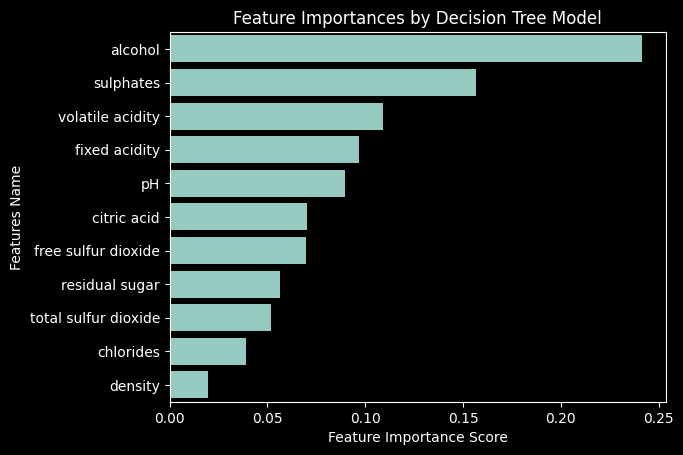

In [ ]:
plt.style.use('dark_background')
sns.barplot(data = coef_res_dtc.sort_values(by = 'scores', ascending = False), y = 'Col_name', x = 'scores')
plt.title('Feature Importances by Decision Tree Model')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features Name')

In [ ]:
importances_rfc = rfc.feature_importances_
importances_rfc

array([0.07032991, 0.13009013, 0.08390374, 0.06007486, 0.08033326,
       0.06104862, 0.07658208, 0.10310385, 0.06018668, 0.12743285,
       0.14691403])

In [ ]:
coef_res = pd.DataFrame({'Col_name': list(X.columns), 'scores': list(importances_rfc)})
coef_res.sort_values(by = 'scores', ascending = False)

,Col_name,scores
10,alcohol,0.146914
1,volatile acidity,0.130090
9,sulphates,0.127433
7,density,0.103104
2,citric acid,0.083904
4,chlorides,0.080333
6,total sulfur dioxide,0.076582
0,fixed acidity,0.070330
5,free sulfur dioxide,0.061049
8,pH,0.060187


Text(0.5, 1.0, 'Feature Importances by Random Forest Model')

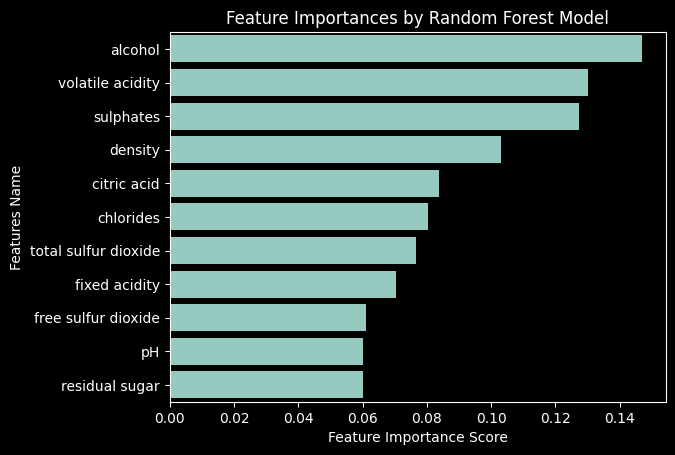

In [ ]:
sns.barplot(data = coef_res.sort_values(by = 'scores', ascending = False), y = 'Col_name', x = 'scores')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features Name')
plt.title('Feature Importances by Random Forest Model')

In [ ]:
# Entropy Calculation for both RFC and DTC
from scipy.stats import entropy
dtc_entropy = entropy(dtc.predict_proba(X_tst_sc).T)
rfc_entropy = entropy(rfc.predict_proba(X_tst_sc).T)
print(dtc_entropy)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Regression

In [ ]:
# Import metrics for regression
from sklearn.metrics import mean_squared_error, r2_score

# Regularized Regression

Advantages of the model:

1. Complexity Control

2. Preventing Overfitting

3. Balancing Bias and Variance

4. Feature Selection

5. Generalization

## Lasso Regression

**Historical Background**

From the Linear Regression equation, when we have $N$ sample of data with $\{(x_i,y_i)\}$ with $x_i$ have $x_{i1}, x_{i2}, x_{i3},......,x_{in}$ is a n-dimensional vector of features and each $y_i ∈ R$ is associated label of the $i^{th}$ sample. The goal is to predict the sample output as close as possible to the actual one $y_i$

$$ y_{predicted} = f (x_i) = β_0 + \sum_{j = 1}^{n} α_i x_{ij}$$

where $α_i$ and $β$ represent slope (or regression weight) and intercept of the line, respectively. Then, we need to evaluate this model by using metrics. We consider the MSE as a cost fuction $E(α)$

$$E (α) = arg min \{ \frac{1}{N}\sum_{i = 1}^{N} (y_{predicted} - y_{actual})^2 \}$$

$$E(α) = arg min \{\frac{1}{N}\sum_{i = 1}^{N} (β_0 + \sum_{j = 1}^{n}α_j x_{ij} - y_{i})^2 \}$$

when we set error fuction to a critical point $∇_α E(α) = 0$ and $β_0 = 0$, we have

$$α = (X^T X)^{-1}X^Ty$$

**Applied Regularization**

Regularization is an error equation that puts contraints on the magnitude of the coefficients and will progressively shrink them towards zero.

In **LASSO** (Least Absolute Shrinkage Selector Operator) regression model, as the name suggest, we add the "sum of the absolute value of the coefficients" in the error function

$$E(α) = argmin \{ \frac{1}{N} \sum_{i = 1}^{N}( \sum_{j = 1}^{n}α_j x_{ij} + β_0 - y_{i})^2 + λ\sum_{i = 1}^{n} |\alpha_j|\}$$

However, this equation DO NOT HAVE CLOSED-FORM SOLUTION because **minimization involved differentiation**. Absolute value and differentation cannot well-bleded.

**How to Solve this problem?**

There exist a number of extremely effective and efficient algorithms that can solve L1-minimization problems. For example, we could use Gradient Descent (perhaps, more accurately, sub-gradient descent), or we could use coordinate descent.


**How LASSO Regression Works?**

Lasso trims down the coefficients of redundant variables to zero and thus directly performs feature selection also.

***NOTE:***

 * If we use high value of λ, we are putting lot of premium on controlling complexity of model.

 * Otherwise( λ → 0), there is (almost) no regularization and there is a high chance of **overfitting**

### Application to the Wine data

In [ ]:
# Import Data
df = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Wine Data/wine_data/WineQT.csv')
df.drop('Id', axis = 1, inplace = True)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
48,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5,6
940,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
640,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5
309,7.0,0.620,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.3,5
539,7.8,0.910,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6


In [ ]:
# Feature Target Separation
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis = 1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Import train, and evaluate model with 0 lambda
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.5463546478728678
R2:  0.04396994807125698


In [ ]:
# Import train, and evaluate model with 0.1 lambda
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.40314609542873786
R2:  0.2945611718539086


In [ ]:
# Import LassoCV to see alpha score differentiation
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
def mse_cv(model):
  mse = -cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 2)
  return mse

alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
lasso_cv = [mse_cv(Lasso(alpha = a)).mean() for a in alphas]
lasso_cv_ser = pd.Series(lasso_cv, index = alphas)
lasso_cv_ser

,0
0.000,0.437535
0.001,0.439684
0.005,0.444697
0.010,0.448202
0.050,0.512761
0.100,0.522280
0.500,0.661679
1.000,0.662019


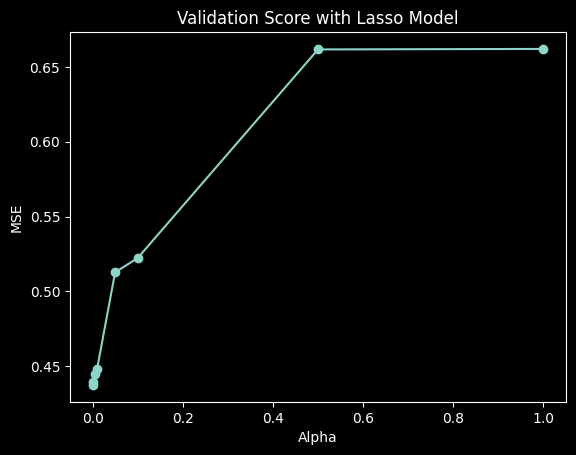

In [ ]:
# Plotting LASSO with the variance of regularized constant \alpha
lasso_cv_ser.plot(marker = 'o', title = 'Validation Score with Lasso Model')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

## Ridge Regression

**Historical Background**

The L1 Regularized Regression (i.e. Ridge Regression) have a similar background to the LASSO regression.

**Applied Regularization to the Error Funcion $E(α)$**

Take a note that the regularized regression is an error equation that puts contraints on the magnitude of the coefficients and will progressively shrink them towards zero. If we add $\lambda \sum_{j = 1}^{n} α^2$ to the equation, it will turn into

$$E(α) = argmin \{ \frac{1}{N} \sum_{i = 1}^{N}( \sum_{j = 1}^{n}α_j x_{ij} + β_0 - y_{i})^2 + λ\sum_{i = 1}^{n} \alpha_j^2\}$$

with the closed form solution

$$α = (X^T + λI)^{-1} X^TY$$

### Application to the Wine dataset

In [ ]:
# Import Ridge model from sklearn linear_model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.3644735774870936
R2:  0.3622316666138773


In [ ]:
# Ridge model with certain alpha scores
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.36877199145721734
R2:  0.3547101548136795


In [ ]:
# Ridge Model with range alpha scores
ridge_cv = [mse_cv(Ridge(alpha = a)).mean() for a in alphas]
ridge_cv_ser = pd.Series(ridge_cv, index = alphas)
ridge_cv_ser

,0
0.000,0.437535
0.001,0.438900
0.005,0.439150
0.010,0.439147
0.050,0.438856
0.100,0.438556
0.500,0.438043
1.000,0.438812


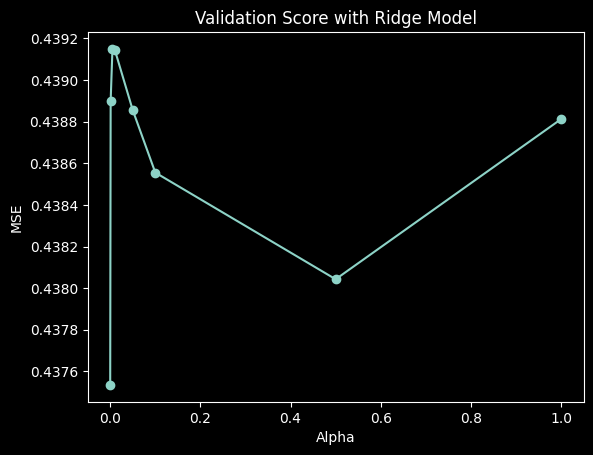

In [ ]:
# Plot the series
ridge_cv_ser.plot(marker = 'o', title = 'Validation Score with Ridge Model')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

## Hyperparameter Tuning



The hyperparameter Tuning is the machine learning parameter configurations before go into the training part.

**Why we need hyperparameter?**

To find optimum value of the model.

There are some tecniques of hyperparameter tuning:

**Grid Search**

Grid search is the simplest algorithm for hyperparameter tuning. Basically, this technique try all combination of the parameter that have been set. It might be simple yet exhausting and also cost a lot of time.

In [ ]:
# import gridsearchCv
from sklearn.model_selection import GridSearchCV

# Param set of LASSO
lasso_param_grid = {'alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 'tol' : [0.0001,0.0005]}

# Create GridSearchCv for LASSO
lasso_grid_search = GridSearchCV(Lasso(), param_grid = lasso_param_grid, cv = 5, scoring = 'neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
print('best parameter for Lasso: ',lasso_grid_search.best_params_)

# Param set of Ridge model
ridge_param_grid = {'alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 'tol' : [0.0001,0.0005]}

# Create GridSearchCv for Ridge
ridge_grid_search = GridSearchCV(Ridge(), param_grid = ridge_param_grid, cv = 5, scoring = 'neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
print('best parameter for Ridge: ',ridge_grid_search.best_params_)

best parameter for Lasso:  {'alpha': 0, 'tol': 0.0001}
best parameter for Ridge:  {'alpha': 0.1, 'tol': 0.0001}
